In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\dines\Downloads\stress.csv")
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [4]:
data.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [5]:
data.shape

(2838, 116)

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [10]:
stopwords = set(STOPWORDS)

In [11]:
data['text']

0       He said he had not felt that way before, sugge...
1       Hey there r/assistance, Not sure if this is th...
2       My mom then hit me with the newspaper and it s...
3       until i met my new boyfriend, he is amazing, h...
4       October is Domestic Violence Awareness Month a...
                              ...                        
2833    * Her, a week ago: Precious, how are you? (I i...
2834    I don't have the ability to cope with it anymo...
2835    In case this is the first time you're reading ...
2836    Do you find this normal? They have a good rela...
2837    I was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [12]:
text = " ".join(i for i in data.text)

In [13]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

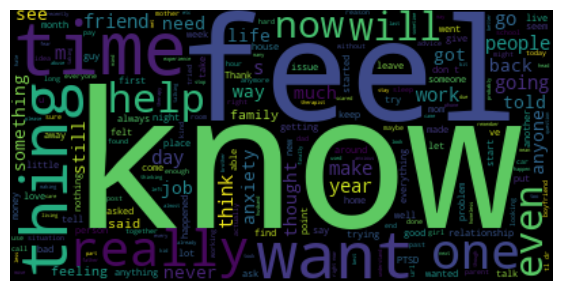

In [14]:
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
import re
import string
import nltk

stemmer = nltk.SnowballStemmer("english")

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

In [16]:
cleaned_text = " ".join(i for i in data.text)

new_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(cleaned_text)



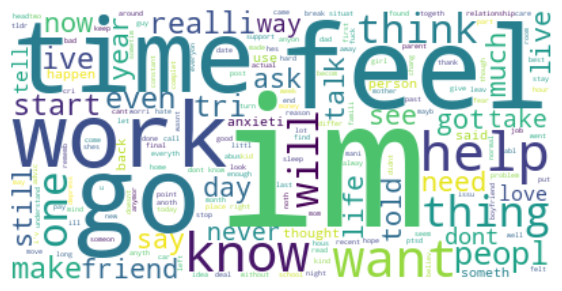

In [17]:
plt.figure( figsize=(7,7))
plt.imshow(new_wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

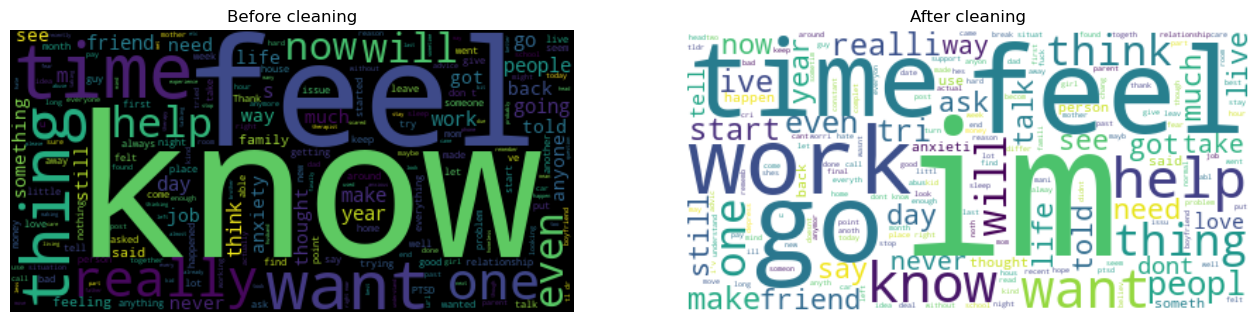

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Before cleaning')
axs[1].imshow(new_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('After cleaning')


plt.show()

In [19]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]

In [20]:
data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock know dont play hit smack...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [26]:
predicted = model.predict(xtest)

In [28]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: i feel like i need a shoulder to lean on
['Stress']


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

   No Stress       0.78      0.65      0.71       270
      Stress       0.72      0.83      0.77       298

    accuracy                           0.74       568
   macro avg       0.75      0.74      0.74       568
weighted avg       0.75      0.74      0.74       568

